## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train_dataset.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as spst
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

### **나.  학습데이터 불러오기**

In [4]:
df = pd.read_csv('train_dataset.csv', sep=",", encoding = 'UTF-8')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [60]:
df['Result_v1'] = df['Result_v1'].map({'malicious':1, 'benign':0})
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,0


# <b>Step 1. 데이터 분석하기
---

## 1. 데이터 단변량 분석하기

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

In [13]:
df.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len',
       'url_hostname_len', 'url_num_dots', 'url_num_underscores',
       'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_chinese_present', 'url_port', 'html_num_tags('iframe')',
       'html_num_tags('script')', 'html_num_tags('embed')',
       'html_num_tags('object')', 'html_num_tags('div')',
       'html_num_tags('head')', 'html_num_tags('body')',
       'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')', 'Result_v1'],
      dtype='object')

### 1) url_host_name

1. 변수가 내포하고 있는 의미

* URL의 hostname 길이

2. 변수가 수치형인지, 범주형인지

In [9]:
# url_hostname_len
var = 'url_hostname_len'
temp = df[var]
temp.unique()

array([ 15.,  17.,  16.,  14.,  27.,  18.,  19.,  25.,  13.,  23.,  20.,
        12.,  10.,  34.,  24.,  32.,  22.,  30.,  28.,  11.,  26.,  42.,
         9.,  21.,  33.,  43.,   8.,  31.,  44.,   6.,  48.,   7.,  37.,
         4.,  68.,  29.,  36.,  40.,  46., 101.,  39.,  38.,  35.,  61.,
        47.,  45.,  52.,  72.,  55.,  56.,  57., 104.,   5.,  41.,  51.,
        74.,  60.,  49., 109.,  85., 100.,  54.,  62.,  53.,  77.,  63.,
       103.])

3. 결측치 존재 여부 및 조치 방안

In [147]:
df['url_hostname_len'].isna().sum()

0

4. 기초 통계량 확인

In [11]:
print(df['url_hostname_len'].value_counts())

17.0    461
13.0    284
14.0    270
15.0    219
16.0    198
       ... 
72.0      1
77.0      1
55.0      1
85.0      1
54.0      1
Name: url_hostname_len, Length: 67, dtype: int64


In [145]:
df['url_hostname_len'].describe()

count    3231.000000
mean       20.450944
std         9.902215
min         4.000000
25%        14.000000
50%        17.000000
75%        24.000000
max       109.000000
Name: url_hostname_len, dtype: float64

5. 데이터 분포 확인

<AxesSubplot:xlabel='url_hostname_len', ylabel='Density'>

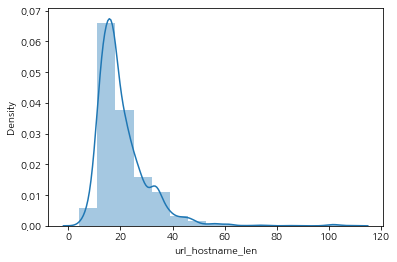

In [146]:
sns.distplot(df['url_hostname_len'], bins=15)

6. 위 정보로부터 파악한 내용 정리

길이가 20대에 많이 분포해있다.

### 2) url_num_dots

1. 변수가 내포하고 있는 의미

* URL내 '.'(닷) 개수

2. 변수가 수치형인지, 범주형인지

In [14]:
# url_num_dots
var = 'url_num_dots'
temp = df[var]
temp.unique()

array([ 2.,  6.,  3.,  4.,  1.,  9.,  5., 32., 10.,  7.,  8., 11., 13.,
       12., 26., 14., 16.])

3. 결측치 존재 여부 및 조치 방안

In [15]:
df['url_num_dots'].isna().sum()

0

4. 기초통계량 확인

In [16]:
print(df['url_num_dots'].value_counts())

2.0     1505
3.0      952
1.0      662
4.0      383
5.0       53
6.0       50
8.0       15
7.0       13
9.0       10
10.0       5
11.0       5
13.0       5
26.0       2
12.0       1
32.0       1
14.0       1
16.0       1
Name: url_num_dots, dtype: int64


5. 데이터 분포 확인

<AxesSubplot:xlabel='url_num_dots', ylabel='Density'>

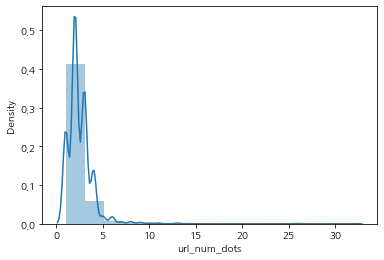

In [17]:
sns.distplot(df['url_num_dots'], bins=15)

6. 위 정보로부터 파악한 내용 정리

대부분 5이하에 많이 분포해있다.

### 3) url_ip_present

1. 변수가 내포하고 있는 의미

* URL내 IP표시 여부

2. 변수가 수치형인지, 범주형인지

In [20]:
# url_ip_present
var = 'url_ip_present'
temp = df[var]
temp.unique()

array([0., 1.])

3. 결측치 존재 여부 및 조치 방안

In [21]:
df['url_ip_present'].isna().sum()

0

4. 기초통계량 확인

In [22]:
print(df['url_ip_present'].value_counts())

0.0    3441
1.0     223
Name: url_ip_present, dtype: int64


5. 데이터 분포 확인

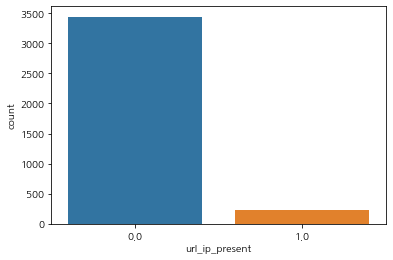

In [62]:
sns.countplot(df['url_ip_present'])
plt.show()

6. 위 정보로부터 파악한 내용 정리

URL내 IP표시 여부가 0, 즉, IP표시가 되어있지 않은 데이터가 더 많다.

### 4) url_entropy

1. 변수가 내포하고 있는 의미

* URL 복잡도

2. 변수가 수치형인지, 범주형인지

In [24]:
# url_entropy
var = 'url_entropy'
temp = df[var]
temp.unique()

array([4.2603326 , 4.63610669, 3.70896608, ..., 4.13535561, 4.36233111,
       3.61947057])

3. 결측치 존재 여부 및 조치 방안

In [25]:
df['url_entropy'].isna().sum()

0

4. 기초통계량 확인

In [26]:
print(df['url_entropy'].value_counts())

3.970176    18
4.084963    14
3.886842    13
3.973661    12
4.053509    11
            ..
3.848885     1
4.691721     1
4.387252     1
3.892487     1
4.023383     1
Name: url_entropy, Length: 2524, dtype: int64


5. 데이터 분포 확인

<AxesSubplot:xlabel='url_entropy', ylabel='Density'>

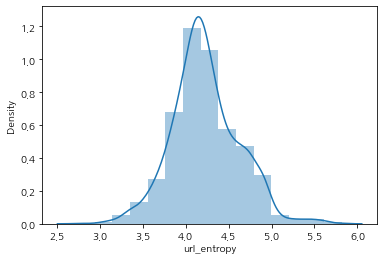

In [27]:
sns.distplot(df['url_entropy'], bins=15)

6. 위 정보로부터 파악한 내용 정리

정규분포를 따르고, 골고루 분포해있다.

### 5) url_chinese_present

1. 변수가 내포하고 있는 의미

* URL내 중국어 표기 여부

2. 변수가 수치형인지, 범주형인지

In [28]:
# url_chinese_present
var = 'url_chinese_present'
temp = df[var]
temp.unique()

array([0.])

3. 결측치 존재 여부 및 조치 방안

In [33]:
df['url_chinese_present'].isna().sum()

0

4. 기초통계량 확인

In [34]:
print(df['url_chinese_present'].value_counts())

0.0    3664
Name: url_chinese_present, dtype: int64


5. 데이터 분포 확인

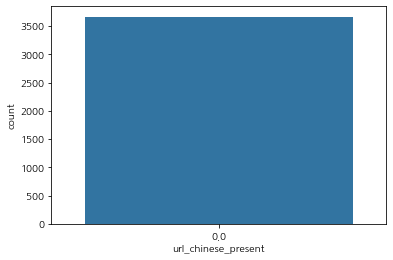

In [63]:
sns.countplot(df['url_chinese_present'])
plt.show()

6. 위 정보로부터 파악한 내용 정리

URL내 중국어가 표기되어 있지 않다.

### 6) url_port

1. 변수가 내포하고 있는 의미

* URL내 포트 표기 여부

2. 변수가 수치형인지, 범주형인지

In [36]:
# url_port
var = 'url_port'
temp = df[var]
temp.unique()

array([0., 1.])

3. 결측치 존재 여부 및 조치 방안

In [37]:
df['url_port'].isna().sum()

0

4. 기초통계량 확인

In [38]:
print(df['url_port'].value_counts())

0.0    3656
1.0       8
Name: url_port, dtype: int64


5. 데이터 분포 확인

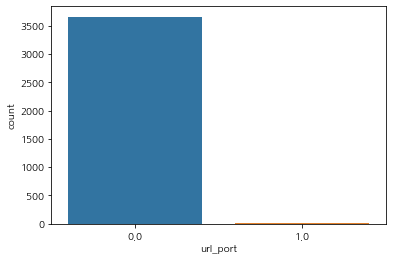

In [64]:
sns.countplot(df['url_port'])
plt.show()

6. 위 정보로부터 파악한 내용 정리

URL내 포트가 표기되어 있지 않은 것이 대부분이다.

### 7) Result_v1

1. 변수가 내포하고 있는 의미

* 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트 - 1, 'benign'은 정상사이트 - 0)

2. 변수가 수치형인지, 범주형인지

In [43]:
# Result_v1
var = 'Result_v1'
temp = df[var]
temp.unique()

array(['malicious', 'benign'], dtype=object)

3. 결측치 존재 여부 및 조치 방안

In [65]:
df['Result_v1'].isna().sum()

0

4. 기초통계량 확인

In [66]:
print(df['Result_v1'].value_counts())

0    1858
1    1806
Name: Result_v1, dtype: int64


5. 데이터 분포 확인

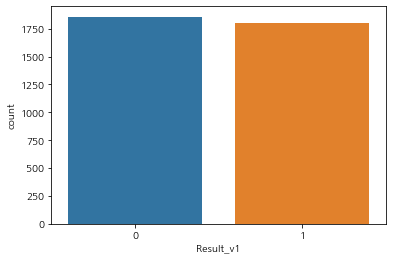

In [67]:
sns.countplot(df['Result_v1'])
plt.show()

6. 위 정보로부터 파악한 내용 정리

정상사이트가 조금 더 많다.

## 2. 데이터 이변량 분석하기

### 1) url_host_name

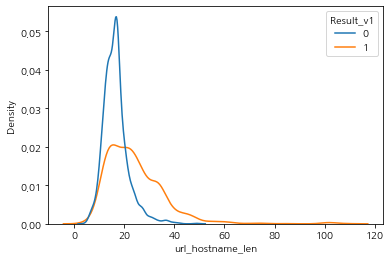

In [148]:
sns.kdeplot(x='url_hostname_len', data = df, hue ='Result_v1')
plt.show()

-> URL의 hostname 길이에 따라서 악성사이트 여부가 관련이 조금 있다.

In [69]:
model = sm.Logit(df['Result_v1'], df['url_hostname_len'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.681632
         Iterations 4
url_hostname_len    1.485847e-19
dtype: float64


### 2) url_num_dots

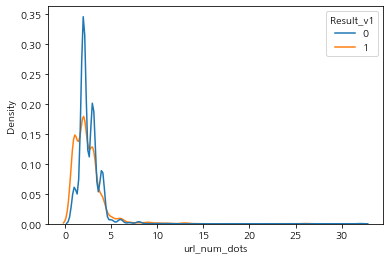

In [70]:
sns.kdeplot(x='url_num_dots', data = df, hue ='Result_v1')
plt.show()

-> URL내 '.'(닷) 개수에 따라서 악성사이트 여부가 관련이 거의 없다.

In [71]:
# 로지스틱 회귀 모형으로 부터 pvalue를 구하기
import statsmodels.api as sm

model = sm.Logit(df['Result_v1'], df['url_num_dots'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692494
         Iterations 3
url_num_dots    0.029147
dtype: float64


### 3) url_ip_present

In [55]:
from statsmodels.graphics.mosaicplot import mosaic

In [75]:
pd.crosstab(df['Result_v1'], df['url_ip_present'])

url_ip_present,0.0,1.0
Result_v1,,
0,1710,148
1,1731,75


Result_v1              0         1
url_ip_present                    
0.0             0.496949  0.503051
1.0             0.663677  0.336323


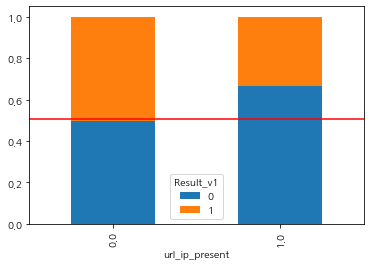

In [72]:
temp = pd.crosstab(df['url_ip_present'], df['Result_v1'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-df['Result_v1'].mean(), color = 'r')
plt.show()

In [74]:
# 먼저 집계
table = pd.crosstab(df['Result_v1'], df['url_ip_present'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량 : ', result[0])
print('p-value : ', result[1])
print('기대빈도\n',result[3])

교차표
 url_ip_present   0.0  1.0
Result_v1                
0               1710  148
1               1731   75
----------------------------------------------------------------------------------------------------
카이제곱통계량 :  22.629448734296957
p-value :  1.9645029354744843e-06
기대빈도
 [[1744.91757642  113.08242358]
 [1696.08242358  109.91757642]]


### 4) url_entropy

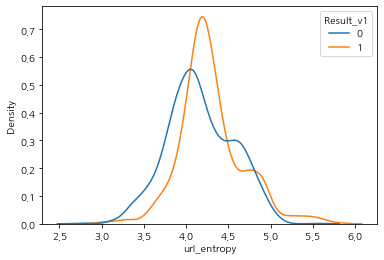

In [76]:
sns.kdeplot(x='url_entropy', data = df, hue ='Result_v1')
plt.show()

-> URL 복잡도에 따라서 악성사이트 여부가 관련이 조금 있다.

In [77]:
# 로지스틱 회귀 모형으로 부터 pvalue를 구하기
import statsmodels.api as sm

model = sm.Logit(df['Result_v1'], df['url_entropy'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2
url_entropy    0.941981
dtype: float64


### 5) url_chinese_present

In [78]:
pd.crosstab(df['Result_v1'], df['url_chinese_present'])

url_chinese_present,0.0
Result_v1,
0,1858
1,1806


Result_v1                   0         1
url_chinese_present                    
0.0                  0.507096  0.492904


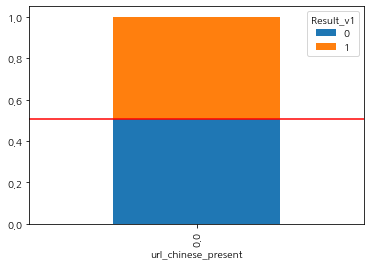

In [79]:
temp = pd.crosstab(df['url_chinese_present'], df['Result_v1'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-df['Result_v1'].mean(), color = 'r')
plt.show()

In [81]:
# 먼저 집계
table = pd.crosstab(df['Result_v1'], df['url_chinese_present'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량 : ', result[0])
print('p-value : ', result[1])
print('기대빈도\n',result[3])

교차표
 url_chinese_present   0.0
Result_v1                
0                    1858
1                    1806
----------------------------------------------------------------------------------------------------
카이제곱통계량 :  0.0
p-value :  1.0
기대빈도
 [[1858.]
 [1806.]]


### 6) url_port

In [82]:
pd.crosstab(df['Result_v1'], df['url_port'])

url_port,0.0,1.0
Result_v1,,
0,1853,5
1,1803,3


Result_v1         0         1
url_port                     
0.0        0.506838  0.493162
1.0        0.625000  0.375000


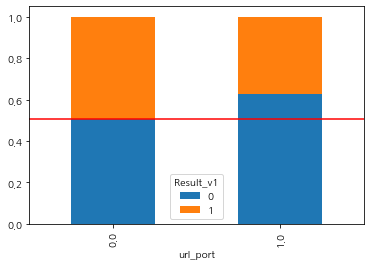

In [83]:
temp = pd.crosstab(df['url_port'], df['Result_v1'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-df['Result_v1'].mean(), color = 'r')
plt.show()

In [84]:
# 먼저 집계
table = pd.crosstab(df['Result_v1'], df['url_port'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량 : ', result[0])
print('p-value : ', result[1])
print('기대빈도\n',result[3])

교차표
 url_port    0.0  1.0
Result_v1           
0          1853    5
1          1803    3
----------------------------------------------------------------------------------------------------
카이제곱통계량 :  0.0984618258872073
p-value :  0.7536833698526882
기대빈도
 [[1853.94323144    4.05676856]
 [1802.05676856    3.94323144]]


### 7) Result_v1

In [85]:
pd.crosstab(df['Result_v1'], df['Result_v1'])

Result_v1,0,1
Result_v1,,
0,1858,0
1,0,1806


Result_v1    0    1
Result_v1          
0          1.0  0.0
1          0.0  1.0


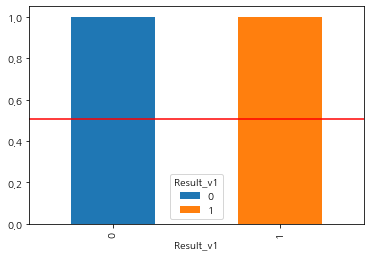

In [86]:
temp = pd.crosstab(df['Result_v1'], df['Result_v1'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-df['Result_v1'].mean(), color = 'r')
plt.show()

In [87]:
# 먼저 집계
table = pd.crosstab(df['Result_v1'], df['Result_v1'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량 : ', result[0])
print('p-value : ', result[1])
print('기대빈도\n',result[3])

교차표
 Result_v1     0     1
Result_v1            
0          1858     0
1             0  1806
----------------------------------------------------------------------------------------------------
카이제곱통계량 :  3660.0002863133354
p-value :  0.0
기대빈도
 [[942.18449782 915.81550218]
 [915.81550218 890.18449782]]


# <b>Step 2. 데이터 전처리
---

## 3. 중복 데이터 제거

In [88]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [93]:
# 중복 데이터 제거를 제거합니다.
df = df.drop_duplicates()

In [94]:
df

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,...,63.0,0.0,0.0,17.0,1.0,1.0,1.0,45.0,0.0,0
3658,14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,1
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,0


In [95]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3233 non-null   float64
 1   url_num_hyphens_dom      3233 non-null   float64
 2   url_path_len             3232 non-null   float64
 3   url_domain_len           3232 non-null   float64
 4   url_hostname_len         3233 non-null   float64
 5   url_num_dots             3233 non-null   float64
 6   url_num_underscores      3233 non-null   float64
 7   url_query_len            3233 non-null   float64
 8   url_num_query_para       3233 non-null   float64
 9   url_ip_present           3233 non-null   float64
 10  url_entropy              3233 non-null   float64
 11  url_chinese_present      3233 non-null   float64
 12  url_port                 3233 non-null   float64
 13  html_num_tags('iframe')  3233 non-null   float64
 14  html_num_tags('script') 

---

## 4. 텍스트와 범주형 특성 처리

In [1]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


In [97]:
df['Result_v1'].unique()

array([1, 0], dtype=int64)

###  replace() 함수를 활용 'benign'은 1로 'malicious'은 -1로 변경. 삭제 후 df['Result_v1'] 전후 데이터를 비교하기.

In [98]:
# 텍스트 데이터를 수치형 데이터로 변경 전 unique() 함수를 통해 유일한 값 확인

df['Result_v1'].unique()

array([1, 0], dtype=int64)

In [ ]:
# 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트 - 1, 'benign'은 정상사이트 - 0)

In [100]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.

df.replace({'Result_v1': {0: 1, 1: -1}})

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,1
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,...,63.0,0.0,0.0,17.0,1.0,1.0,1.0,45.0,0.0,1
3658,14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,1
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,-1
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,1


---

## 5. 결측치 처리

In [103]:
# 결축치의 존재를 확인합니다.

df.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3233 non-null   float64
 1   url_num_hyphens_dom      3233 non-null   float64
 2   url_path_len             3232 non-null   float64
 3   url_domain_len           3232 non-null   float64
 4   url_hostname_len         3233 non-null   float64
 5   url_num_dots             3233 non-null   float64
 6   url_num_underscores      3233 non-null   float64
 7   url_query_len            3233 non-null   float64
 8   url_num_query_para       3233 non-null   float64
 9   url_ip_present           3233 non-null   float64
 10  url_entropy              3233 non-null   float64
 11  url_chinese_present      3233 non-null   float64
 12  url_port                 3233 non-null   float64
 13  html_num_tags('iframe')  3233 non-null   float64
 14  html_num_tags('script') 

In [107]:
# 결측치를 적절히 처리해줍니다.

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3231 non-null   float64
 1   url_num_hyphens_dom      3231 non-null   float64
 2   url_path_len             3231 non-null   float64
 3   url_domain_len           3231 non-null   float64
 4   url_hostname_len         3231 non-null   float64
 5   url_num_dots             3231 non-null   float64
 6   url_num_underscores      3231 non-null   float64
 7   url_query_len            3231 non-null   float64
 8   url_num_query_para       3231 non-null   float64
 9   url_ip_present           3231 non-null   float64
 10  url_entropy              3231 non-null   float64
 11  url_chinese_present      3231 non-null   float64
 12  url_port                 3231 non-null   float64
 13  html_num_tags('iframe')  3231 non-null   float64
 14  html_num_tags('script') 

In [108]:
# 결축치의 존재를 확인합니다.

df.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

---

## 6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

In [111]:
df.corr()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
url_len,1.000000,-0.025183,0.944497,0.001670,0.002085,0.267134,0.307256,0.318540,0.267502,-0.067771,...,-0.026803,-0.012114,-0.021489,-0.013241,0.074980,0.043752,-0.037282,-0.019775,NaN,-0.006429
url_num_hyphens_dom,-0.025183,1.000000,-0.097643,0.589203,0.590278,-0.085324,-0.063695,0.001715,-0.002627,-0.124600,...,-0.110263,-0.052932,-0.048672,-0.013765,0.039036,-0.043295,0.038427,-0.036904,NaN,0.355480
url_path_len,0.944497,-0.097643,1.000000,-0.123280,-0.123081,0.196425,0.254179,0.011303,0.010422,-0.037249,...,0.006749,-0.003340,-0.015291,-0.008044,0.078578,-0.006032,-0.042510,-0.008870,NaN,-0.113835
url_domain_len,0.001670,0.589203,-0.123280,1.000000,0.998956,0.082025,-0.092685,0.014915,0.015721,-0.150800,...,-0.103895,-0.012265,-0.029448,-0.002495,0.002868,0.031097,0.033835,-0.035063,NaN,0.380448
url_hostname_len,0.002085,0.590278,-0.123081,0.998956,1.000000,0.078337,-0.094091,0.016032,0.016803,-0.169295,...,-0.101211,-0.011445,-0.030490,-0.001540,0.002779,0.031446,0.036627,-0.033953,NaN,0.384489
url_num_dots,0.267134,-0.085324,0.196425,0.082025,0.078337,1.000000,0.261850,0.227932,0.197153,0.184992,...,-0.086458,-0.030750,-0.017976,-0.027272,-0.024784,-0.000531,-0.066137,-0.027895,NaN,-0.047256
url_num_underscores,0.307256,-0.063695,0.254179,-0.092685,-0.094091,0.261850,1.000000,0.246116,0.245183,-0.052211,...,-0.069631,-0.029422,-0.021538,-0.017179,0.058713,0.031360,-0.079358,-0.007495,NaN,-0.133808
url_query_len,0.318540,0.001715,0.011303,0.014915,0.016032,0.227932,0.246116,1.000000,0.834315,-0.048321,...,-0.069375,-0.024240,-0.011191,-0.016998,-0.001409,0.150485,-0.001790,-0.023486,NaN,0.189689
url_num_query_para,0.267502,-0.002627,0.010422,0.015721,0.016803,0.197153,0.245183,0.834315,1.000000,-0.046998,...,-0.066136,-0.023577,-0.016486,-0.015185,-0.019294,0.109691,-0.005181,-0.022982,NaN,0.184497
url_ip_present,-0.067771,-0.124600,-0.037249,-0.150800,-0.169295,0.184992,-0.052211,-0.048321,-0.046998,1.000000,...,-0.086306,-0.032573,0.041407,-0.031192,0.012362,-0.018434,-0.077854,-0.035891,NaN,-0.076236


In [113]:
df.drop(['url_chinese_present', "html_num_tags('applet')"], axis = 1, inplace = True)

In [114]:
df

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,...,0.0,63.0,0.0,0.0,17.0,1.0,1.0,1.0,45.0,0
3658,14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,1
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,1.0,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0


---

## 7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

In [122]:
target = 'Result_v1'
x = df.drop(target, axis = 1)
y = df.loc[:, target]

In [125]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Result_v1, dtype: int64

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [139]:
print(x_train.shape[0])
print(x_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

2261
970
2261
970
